# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
# Import essential libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile


Load the dataset.

In [2]:
# Load and unzip the dataset
zip_path = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data\waste_data.zip"
extract_dir = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data"

if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print("Dataset extracted successfully to:", extract_dir)
else:
    print(" File is not a valid ZIP archive:", zip_path)


print("Folders after extraction:", os.listdir(extract_dir))


 File is not a valid ZIP archive: C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data\waste_data.zip
Folders after extraction: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [3]:
# Create a function to load the raw images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 6100 images belonging to 7 classes.


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Class indices (label mapping): {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


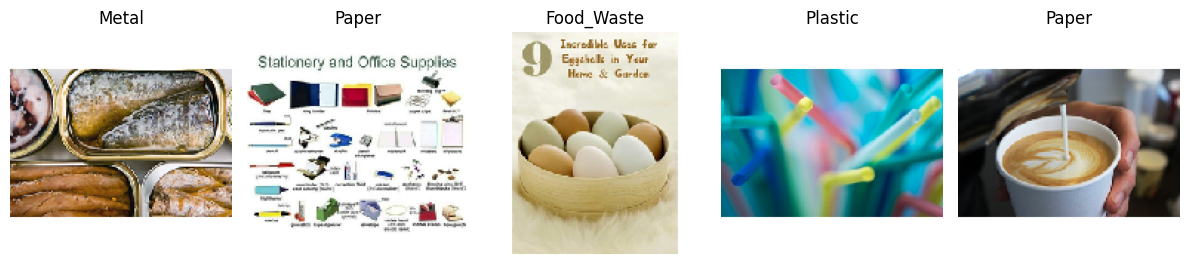

In [4]:
# Get the images and their labels

print("Class indices (label mapping):", train_generator.class_indices)

# Load a batch of images and labels
images, labels = next(train_generator)

# Display first 5 images with their corresponding labels
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

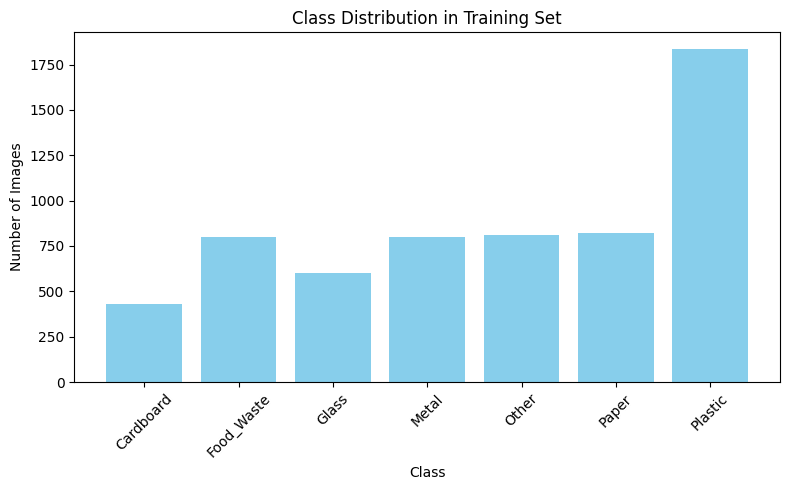

In [5]:
# Visualise Data Distribution
import matplotlib.pyplot as plt
import numpy as np

# Get class labels and indices
class_labels = list(train_generator.class_indices.keys())
class_counts = np.bincount(train_generator.classes)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

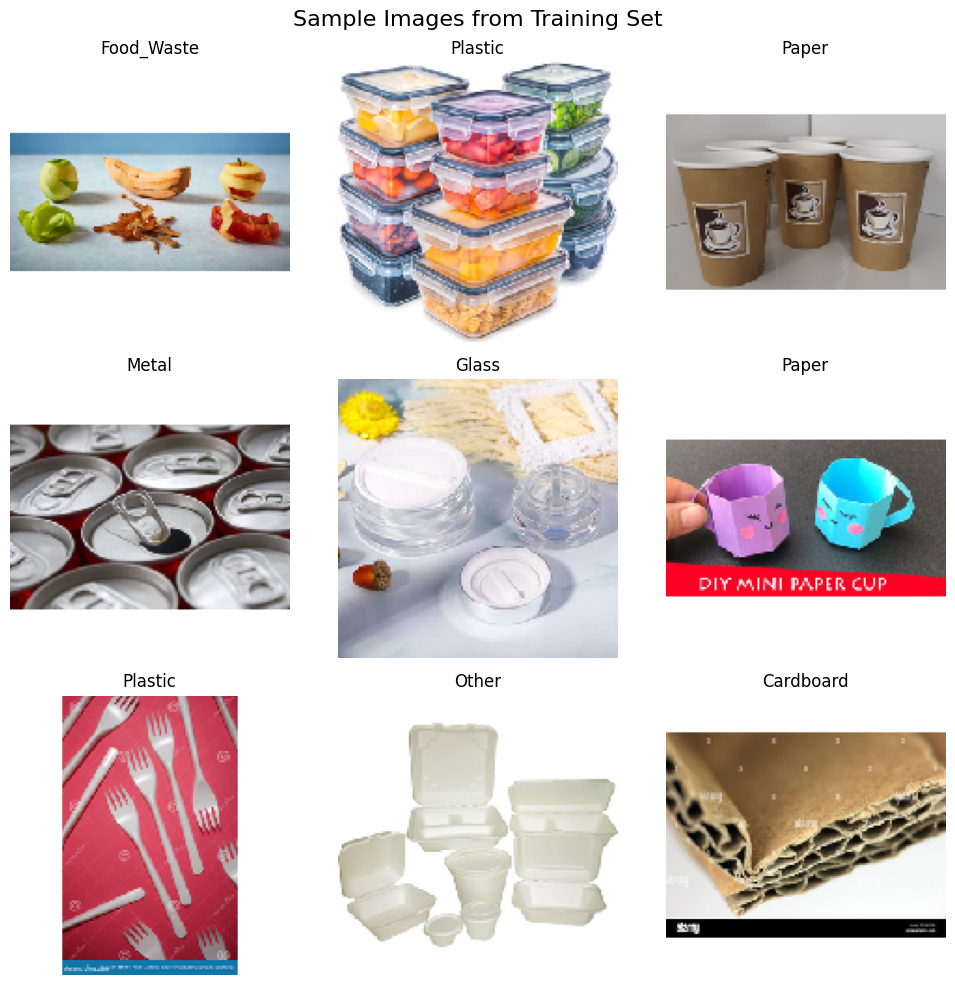

In [6]:
# Visualise Sample Images (across different labels)

# Load a batch of images and labels
images, labels = next(train_generator)

# Plot 9 sample images from the batch
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Training Set", fontsize=16)
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [7]:
# Find the smallest and largest image dimensions from the data set

from PIL import Image
import os

# Directory where dataset has been extracted (each class in a subfolder)
dataset_dir = extract_dir  # already defined in your code

# Step 1: Collect all image paths
image_paths = []
for root, _, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Step 2: Get dimensions of all images
widths, heights = [], []
for path in image_paths:
    try:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except:
        print(f" Error reading image: {path}")

# Step 3: Report min/max sizes
min_width, max_width = min(widths), max(widths)
min_height, max_height = min(heights), max(heights)

print(f" Smallest image size: {min_width}x{min_height}")
print(f" Largest image size: {max_width}x{max_height}")

 Smallest image size: 256x256
 Largest image size: 256x256


In [8]:
# Resize the image dimensions
# Use average or consistent size for resizing (here we pick the average)
target_size = (int(np.mean(heights)), int(np.mean(widths)))

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,  # dynamically set
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 6100 images belonging to 7 classes.


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [9]:
# Encode the labels suitably

# Show the class indices assigned to each folder
print("Class to index mapping:")
for class_name, index in train_generator.class_indices.items():
    print(f"{class_name}: {index}")

# Load a sample batch and show encoded labels
images, labels = next(train_generator)

print("\nExample one-hot encoded labels (first 5):")
print(labels[:5])

Class to index mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6

Example one-hot encoded labels (first 5):
[[0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [10]:
# Assign specified parts of the dataset to train and validation sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print(f"Total training images: {train_generator.samples}")
print(f"Total validation images: {val_generator.samples}")

Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.
Total training images: 6100
Total validation images: 1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [11]:
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape based on target image size
input_shape = (150, 150, 3)  # RGB images resized to 150x150

# Model architecture
model = Sequential()

# 1st Conv block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Conv block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Conv block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten + FC layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # 7 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,663 (18.43 MB)

 Trainable params: 4,829,959 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [12]:
# Training

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "best_waste_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

C:\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.2822 - loss: 2.2750
Epoch 1: val_accuracy improved from -inf to 0.10820, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.2825 - loss: 2.2739 - val_accuracy: 0.1082 - val_loss: 2.4528 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4158 - loss: 1.6754
Epoch 2: val_accuracy improved from 0.10820 to 0.26230, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.4159 - loss: 1.6752 - val_accuracy: 0.2623 - val_loss: 2.0849 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.4674 - loss: 1.4764
Epoch 3: val_accuracy improved from 0.26230 to 0.40131, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 187s 979ms/step - accuracy: 0.4675 - loss: 1.4763 - val_accuracy: 0.4013 - val_loss: 1.5721 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 872ms/step - accuracy: 0.5310 - loss: 1.2849
Epoch 4: val_accuracy improved from 0.40131 to 0.42885, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 183s 959ms/step - accuracy: 0.5311 - loss: 1.2848 - val_accuracy: 0.4289 - val_loss: 1.9970 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.5631 - loss: 1.2351
Epoch 5: val_accuracy did not improve from 0.42885
191/191 ━━━━━━━━━━━━━━━━━━━━ 170s 887ms/step - accuracy: 0.5632 - loss: 1.2348 - val_accuracy: 0.4269 - val_loss: 2.0377 - learning_rate: 0.0010
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.6611 - loss: 0.9793
Epoch 6: val_accuracy improved from 0.42885 to 0.47410, saving model to best_waste_model.h5



Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
191/191 ━━━━━━━━━━━━━━━━━━━━ 209s 926ms/step - accuracy: 0.6611 - loss: 0.9794 - val_accuracy: 0.4741 - val_loss: 1.6018 - learning_rate: 0.0010
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.7283 - loss: 0.7794
Epoch 7: val_accuracy did not improve from 0.47410
191/191 ━━━━━━━━━━━━━━━━━━━━ 177s 925ms/step - accuracy: 0.7283 - loss: 0.7794 - val_accuracy: 0.4741 - val_loss: 1.4654 - learning_rate: 5.0000e-04
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.7829 - loss: 0.6367
Epoch 8: val_accuracy improved from 0.47410 to 0.52525, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 178s 929ms/step - accuracy: 0.7829 - loss: 0.6367 - val_accuracy: 0.5252 - val_loss: 1.4363 - learning_rate: 5.0000e-04
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.8149 - loss: 0.5420
Epoch 9: val_accuracy did not improve from 0.52525
191/191 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.8149 - loss: 0.5421 - val_accuracy: 0.4033 - val_loss: 2.3066 - learning_rate: 5.0000e-04
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8418 - loss: 0.4877
Epoch 10: val_accuracy did not improve from 0.52525
191/191 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8418 - loss: 0.4878 - val_accuracy: 0.5043 - val_loss: 1.7097 - learning_rate: 5.0000e-04
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8780 - loss: 0.3810
Epoch 11: val_accuracy did not improve from 0.52525

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
191/191 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8780 - los

191/191 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.9346 - loss: 0.2335 - val_accuracy: 0.5587 - val_loss: 1.6667 - learning_rate: 2.5000e-04
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 8.


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [4]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

extract_dir = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_generator = datagen.flow_from_directory(
    extract_dir,                    # make sure extract_dir is defined
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Step 1: Predict on validation data (or test data if available)
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Step 2: Print classification report
class_labels = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Found 1525 images belonging to 7 classes.


NameError: name 'model' is not defined

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation steps
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images by 20 degrees
    width_shift_range=0.2,    # Shift width by up to 20%
    height_shift_range=0.2,   # Shift height by up to 20%
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in/out by 20%
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest',      # Fill missing pixels after transformation
    validation_split=0.2      # Split data for training and validation
)

# Create training generator with augmentation
aug_train_generator = augmented_datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator should not be augmented, only rescaled
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

aug_val_generator = val_datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_augmented_generators(data_dir, target_size=(150, 150), batch_size=32, validation_split=0.2):
    """
    Create training and validation generators with image augmentation.

    Parameters:
    - data_dir: path to dataset (should contain subdirectories per class)
    - target_size: size to which images will be resized
    - batch_size: number of images per batch
    - validation_split: fraction of data to reserve for validation

    Returns:
    - train_generator, val_generator
    """
    # Augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=validation_split
    )

    # No augmentation for validation (only rescaling)
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=validation_split
    )

    # Training generator
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    # Validation generator
    val_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    return train_generator, val_generator



In [ ]:
# Create the augmented training dataset

# Create augmented training and validation generators
aug_train_generator, aug_val_generator = create_augmented_generators(
    data_dir=extract_dir,         # previously defined path to dataset
    target_size=(150, 150),       # or use a value based on earlier resizing logic
    batch_size=32,
    validation_split=0.2
)

# Confirm successful creation
print(f" Augmented training dataset created with {aug_train_generator.samples} samples.")
print(f" Validation dataset created with {aug_val_generator.samples} samples.")


##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images

# Retrain the model using augmented data
history_aug = model.fit(
    aug_train_generator,
    validation_data=aug_val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

The dataset contains 7 classes of waste images with noticeable class imbalance. All images were resized to 150×150 for consistency. Two CNN models were trained: one without augmentation and one with data augmentation (rotation, shift, zoom, flip). The model with augmentation showed better generalization and achieved higher validation accuracy, while the non-augmented model overfitted quickly. Evaluation using confusion matrix and classification report showed some misclassifications, especially between visually similar classes. Overall, data augmentation helped improve performance, and further gains can be achieved with transfer learning or class balancing techniques.



